In [1]:
#Rudrasish Mishra
import platform
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
bank = pd.read_csv('BANK DATA.csv')
bank.columns = map(str.lower, bank.columns)

In [3]:
bank.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bank.shape

(10000, 14)

In [5]:
bank.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [6]:
bank.dtypes

rownumber            int64
customerid           int64
surname             object
creditscore          int64
geography           object
gender              object
age                  int64
tenure               int64
balance            float64
numofproducts        int64
hascrcard            int64
isactivemember       int64
estimatedsalary    float64
exited               int64
dtype: object

In [7]:
bank.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
rownumber          10000 non-null int64
customerid         10000 non-null int64
surname            10000 non-null object
creditscore        10000 non-null int64
geography          10000 non-null object
gender             10000 non-null object
age                10000 non-null int64
tenure             10000 non-null int64
balance            10000 non-null float64
numofproducts      10000 non-null int64
hascrcard          10000 non-null int64
isactivemember     10000 non-null int64
estimatedsalary    10000 non-null float64
exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
rownumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
customerid,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
creditscore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
numofproducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
hascrcard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
isactivemember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimatedsalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [10]:
bank.describe(include='all')

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [11]:
bank.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [12]:
bank.groupby("exited").agg("mean")

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
exited,,,,,,,,,,
0,5024.694964,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,4905.917526,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [13]:
bank.groupby("gender").agg({"age": "mean"})

,age
gender,
Female,39.238389
Male,38.658237


In [14]:
bank.groupby("geography").agg({"exited": "mean"})

,exited
geography,
France,0.161548
Germany,0.324432
Spain,0.166734


In [15]:
bank["exited"].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

In [16]:
churn = bank[bank["exited"] == 1]
churn.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [17]:
churn.shape

(2037, 14)

In [18]:
churn.groupby("gender").agg({"exited": "count"})

,exited
gender,
Female,1139
Male,898


In [19]:
churn.groupby("geography").agg({"exited": "count"})

,exited
geography,
France,810
Germany,814
Spain,413


In [20]:
non_churn = bank[bank["exited"] == 0]

In [21]:
non_churn.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [22]:
non_churn.shape

(7963, 14)

In [23]:
non_churn.groupby("geography").agg({"exited": "count"})

,exited
geography,
France,4204
Germany,1695
Spain,2064


In [24]:
bank.groupby('surname')['surname'].count().sort_values(ascending=False).head(10)

surname
Smith       32
Martin      29
Scott       29
Walker      28
Brown       26
Shih        25
Genovese    25
Yeh         25
Maclean     24
Wright      24
Name: surname, dtype: int64

In [25]:
bank["NewAge"] = pd.qcut(bank['age'], 5)
bank.groupby("NewAge")["exited"].value_counts()

NewAge          exited
(17.999, 31.0]  0         2191
                1          181
(31.0, 35.0]    0         1615
                1          166
(35.0, 40.0]    0         1927
                1          339
(40.0, 46.0]    0         1211
                1          485
(46.0, 92.0]    0         1019
                1          866
Name: exited, dtype: int64

In [26]:
bank.groupby(["gender","NewAge" ])["exited"].value_counts()

gender  NewAge          exited
Female  (17.999, 31.0]  0          959
                        1          107
        (31.0, 35.0]    0          670
                        1           96
        (35.0, 40.0]    0          818
                        1          189
        (40.0, 46.0]    0          525
                        1          263
        (46.0, 92.0]    1          484
                        0          432
Male    (17.999, 31.0]  0         1232
                        1           74
        (31.0, 35.0]    0          945
                        1           70
        (35.0, 40.0]    0         1109
                        1          150
        (40.0, 46.0]    0          686
                        1          222
        (46.0, 92.0]    0          587
                        1          382
Name: exited, dtype: int64

In [27]:
bank[(bank["balance"] == 0) & (bank["exited"] == 0)].shape

(3117, 15)

In [28]:

bank[(bank["balance"] == 0) & (bank["exited"] == 1)].shape

(500, 15)

In [29]:
bank.corr()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
rownumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
customerid,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
creditscore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
numofproducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
hascrcard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
isactivemember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimatedsalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


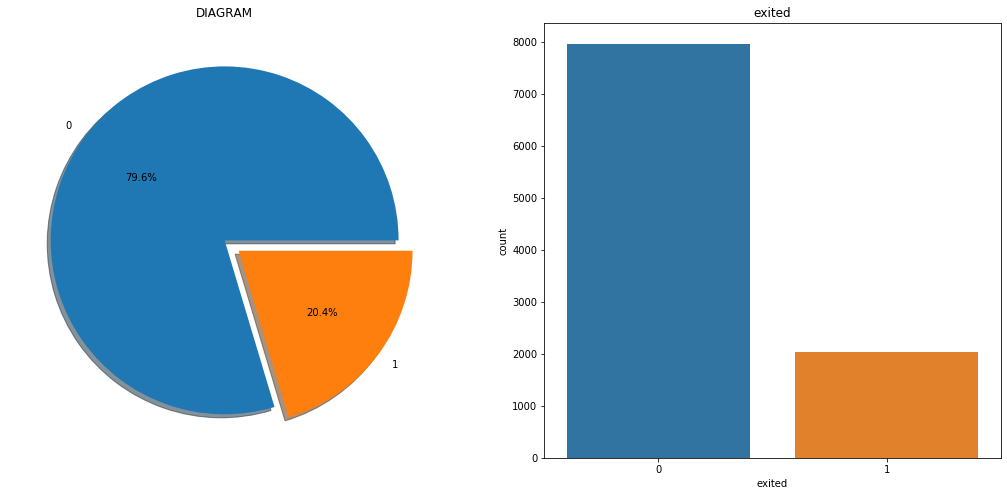

In [30]:
f,ax=plt.subplots(1,2,figsize=(18,8))
bank['exited'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('DIAGRAM')
ax[0].set_ylabel('')
sns.countplot('exited',data=bank,ax=ax[1])
ax[1].set_title('exited')
plt.show()


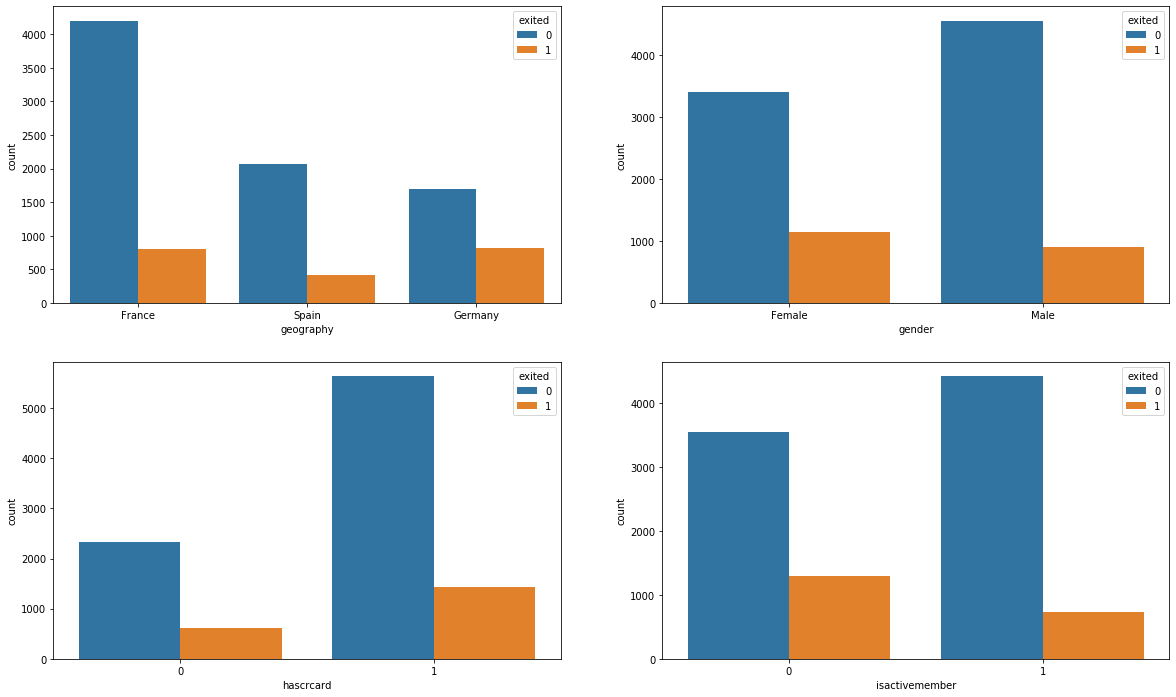

In [31]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='geography', hue = 'exited',data = bank, ax=axarr[0][0])
sns.countplot(x='gender', hue = 'exited',data = bank, ax=axarr[0][1])
sns.countplot(x='hascrcard', hue = 'exited',data = bank, ax=axarr[1][0])
sns.countplot(x='isactivemember', hue = 'exited',data = bank, ax=axarr[1][1])

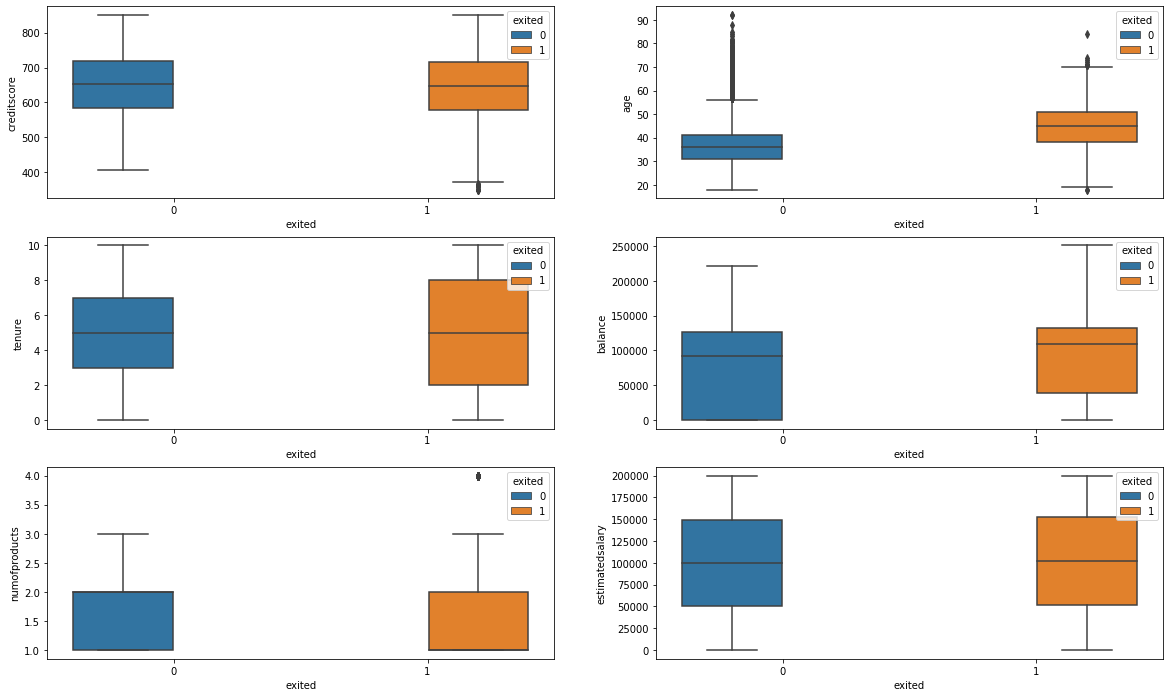

In [32]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='creditscore',x = 'exited', hue = 'exited',data = bank, ax=axarr[0][0])
sns.boxplot(y='age',x = 'exited', hue = 'exited',data = bank , ax=axarr[0][1])
sns.boxplot(y='tenure',x = 'exited', hue = 'exited',data = bank, ax=axarr[1][0])
sns.boxplot(y='balance',x = 'exited', hue = 'exited',data = bank, ax=axarr[1][1])
sns.boxplot(y='numofproducts',x = 'exited', hue = 'exited',data = bank, ax=axarr[2][0])
sns.boxplot(y='estimatedsalary',x = 'exited', hue = 'exited',data = bank, ax=axarr[2][1])

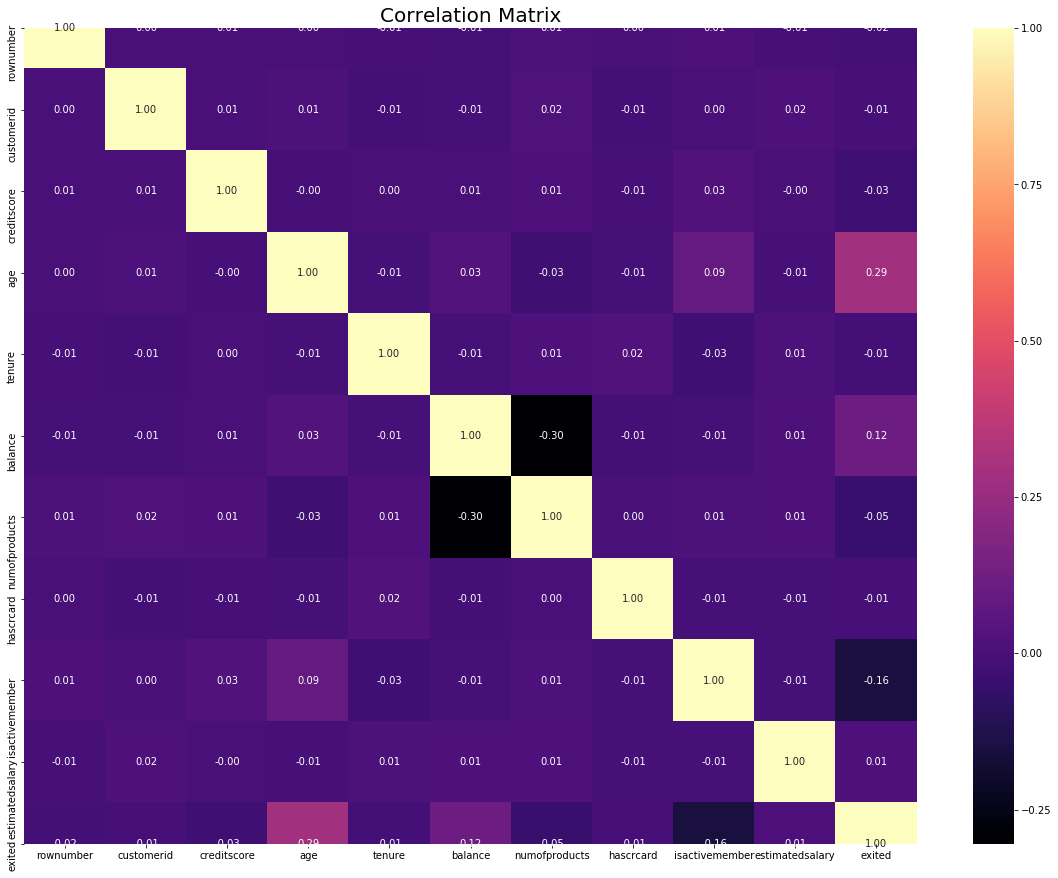

In [33]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(bank.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [34]:
bank.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
NewAge             0
dtype: int64

In [35]:
for feature in bank[['creditscore','tenure', 'balance','estimatedsalary']]:
    
    Q1 = bank[feature].quantile(0.25)
    Q3 = bank[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if bank[(bank[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

creditscore no
tenure no
balance no
estimatedsalary no


In [36]:
bank["NewAGT"] = bank["age"] - bank["tenure"]
bank["CreditsScore"] = pd.qcut(bank['creditscore'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
bank["AgeScore"] = pd.qcut(bank['age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
bank["BalanceScore"] = pd.qcut(bank['balance'].rank(method="first"), 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
bank["EstSalaryScore"] = pd.qcut(bank['estimatedsalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
bank["NewEstimatedSalary"] = bank["estimatedsalary"] / 12 

In [37]:
bank.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,...,isactivemember,estimatedsalary,exited,NewAge,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,1,101348.88,1,"(40.0, 46.0]",40,4,6,1,6,8445.740000
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,1,112542.58,0,"(40.0, 46.0]",40,4,6,5,6,9378.548333
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,0,113931.57,1,"(40.0, 46.0]",34,1,6,10,6,9494.297500
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,0,93826.63,0,"(35.0, 40.0]",38,7,5,1,5,7818.885833
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,1,79084.10,0,"(40.0, 46.0]",41,10,6,8,4,6590.341667


In [38]:
bank = bank.drop(["customerid","surname","NewAge"], axis = 1)

In [39]:
bank.head()

,rownumber,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40,4,6,1,6,8445.740000
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40,4,6,5,6,9378.548333
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,34,1,6,10,6,9494.297500
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0,38,7,5,1,5,7818.885833
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41,10,6,8,4,6590.341667


In [40]:
print('python version', platform.python_version())
print('pandas version', pd.__version__)
print('sklearn version', sklearn.__version__)
print('numpy version', np.__version__)
print('matplotlib version', matplotlib.__version__)

python version 3.7.4
pandas version 0.25.1
sklearn version 0.21.3
numpy version 1.16.5
matplotlib version 3.1.1


In [41]:
bank.isnull().sum()

rownumber             0
creditscore           0
geography             0
gender                0
age                   0
tenure                0
balance               0
numofproducts         0
hascrcard             0
isactivemember        0
estimatedsalary       0
exited                0
NewAGT                0
CreditsScore          0
AgeScore              0
BalanceScore          0
EstSalaryScore        0
NewEstimatedSalary    0
dtype: int64

In [42]:
bank = pd.get_dummies(bank, columns =["geography", "gender"], drop_first = True)

In [43]:
bank.head()

,rownumber,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,geography_Germany,geography_Spain,gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,40,4,6,1,6,8445.740000,0,0,0
1,2,608,41,1,83807.86,1,0,1,112542.58,0,40,4,6,5,6,9378.548333,0,1,0
2,3,502,42,8,159660.80,3,1,0,113931.57,1,34,1,6,10,6,9494.297500,0,0,0
3,4,699,39,1,0.00,2,0,0,93826.63,0,38,7,5,1,5,7818.885833,0,0,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0,41,10,6,8,4,6590.341667,0,1,0


In [44]:
geo_df = bank[["geography_Germany", "geography_Spain", "gender_Male", "hascrcard","isactivemember"]]

In [45]:
geo_df.head()

,geography_Germany,geography_Spain,gender_Male,hascrcard,isactivemember
0,0,0,0,1,1
1,0,1,0,0,1
2,0,0,0,1,0
3,0,0,0,0,0
4,0,1,0,1,1


In [46]:
y = bank["exited"]
X = bank.drop(["exited","geography_Germany", "geography_Spain", "gender_Male", "hascrcard","isactivemember"], axis = 1)
cols = X.columns
index = X.index

In [47]:
X.head()    

,rownumber,creditscore,age,tenure,balance,numofproducts,estimatedsalary,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary
0,1,619,42,2,0.00,1,101348.88,40,4,6,1,6,8445.740000
1,2,608,41,1,83807.86,1,112542.58,40,4,6,5,6,9378.548333
2,3,502,42,8,159660.80,3,113931.57,34,1,6,10,6,9494.297500
3,4,699,39,1,0.00,2,93826.63,38,7,5,1,5,7818.885833
4,5,850,43,2,125510.82,1,79084.10,41,10,6,8,4,6590.341667


In [48]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: exited, Length: 10000, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [51]:
print(X_train)

[[ 1.4692775   0.35649971 -0.6557859  ... -0.51496254  1.21181575
   1.36766974]
 [-1.19499359 -0.20389777  0.29493847 ...  0.52888044  1.55988864
   1.6612541 ]
 [-1.15724427 -0.96147213 -1.41636539 ...  0.52888044 -0.18047579
  -0.25280688]
 ...
 [ 0.13108128  0.86500853 -0.08535128 ... -1.21085786 -0.18047579
  -0.1427649 ]
 [-1.43776677  0.15932282  0.3900109  ...  1.57272342 -0.18047579
  -0.05082558]
 [ 0.78217054  0.47065475  1.15059039 ...  1.22477576 -0.87662156
  -0.81456811]]


In [52]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

C:\Users\KIIT\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [53]:
print(model.feature_importances_)

[0.08429345 0.07197271 0.0822339  0.06612166 0.07796141 0.13179639
 0.06247894 0.07169177 0.05889117 0.12362573 0.05702827 0.04759436
 0.06431025]


In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

C:\Users\KIIT\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
y_predict = rfc.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix
conmat = confusion_matrix(y_test,y_predict)
print(conmat)
print(accuracy_score(y_test,y_predict))

[[1521   86]
 [ 253  140]]
0.8305


In [57]:
bank.columns

Index(['rownumber', 'creditscore', 'age', 'tenure', 'balance', 'numofproducts',
       'hascrcard', 'isactivemember', 'estimatedsalary', 'exited', 'NewAGT',
       'CreditsScore', 'AgeScore', 'BalanceScore', 'EstSalaryScore',
       'NewEstimatedSalary', 'geography_Germany', 'geography_Spain',
       'gender_Male'],
      dtype='object')

In [58]:
bank.dtypes

rownumber                int64
creditscore              int64
age                      int64
tenure                   int64
balance                float64
numofproducts            int64
hascrcard                int64
isactivemember           int64
estimatedsalary        float64
exited                   int64
NewAGT                   int64
CreditsScore          category
AgeScore              category
BalanceScore          category
EstSalaryScore        category
NewEstimatedSalary     float64
geography_Germany        uint8
geography_Spain          uint8
gender_Male              uint8
dtype: object

In [59]:
new_estimated_salary_filter = bank.NewEstimatedSalary == " "
bank = bank[~new_estimated_salary_filter]
bank.shape

C:\Users\KIIT\Anaconda\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


(10000, 19)

In [60]:
bank.TotalCharges = pd.to_numeric(bank.NewEstimatedSalary)

C:\Users\KIIT\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [61]:
bank.isnull().sum()

rownumber             0
creditscore           0
age                   0
tenure                0
balance               0
numofproducts         0
hascrcard             0
isactivemember        0
estimatedsalary       0
exited                0
NewAGT                0
CreditsScore          0
AgeScore              0
BalanceScore          0
EstSalaryScore        0
NewEstimatedSalary    0
geography_Germany     0
geography_Spain       0
gender_Male           0
dtype: int64

In [62]:
bank.describe()

,rownumber,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,NewAGT,NewEstimatedSalary,geography_Germany,geography_Spain,gender_Male
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,33.909000,8340.853323,0.250900,0.247700,0.545700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,10.907118,4792.541068,0.433553,0.431698,0.497932
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,8.000000,0.965000,0.000000,0.000000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,27.000000,4250.175833,0.000000,0.000000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,32.000000,8349.492917,0.000000,0.000000,1.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,39.000000,12449.020625,1.000000,0.000000,1.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,91.000000,16666.040000,1.000000,1.000000,1.000000


In [63]:
bank.describe(include='all')

,rownumber,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,NewAGT,CreditsScore,AgeScore,BalanceScore,EstSalaryScore,NewEstimatedSalary,geography_Germany,geography_Spain,gender_Male
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,8.0,10.0,10.0,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,10.0,10.0,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1030.0,1497.0,1000.0,1000.0,NaN,NaN,NaN,NaN
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,33.909000,NaN,NaN,NaN,NaN,8340.853323,0.250900,0.247700,0.545700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,10.907118,NaN,NaN,NaN,NaN,4792.541068,0.433553,0.431698,0.497932
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,8.000000,NaN,NaN,NaN,NaN,0.965000,0.000000,0.000000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,27.000000,NaN,NaN,NaN,NaN,4250.175833,0.000000,0.000000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,32.000000,NaN,NaN,NaN,NaN,8349.492917,0.000000,0.000000,1.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,39.000000,NaN,NaN,NaN,NaN,12449.020625,1.000000,0.000000,1.000000


In [64]:
bank_columns=['rownumber', 'creditscore', 'age', 'tenure', 'balance', 'numofproducts',
       'hascrcard', 'isactivemember', 'estimatedsalary', 'NewAGT',
       'CreditsScore', 'AgeScore', 'BalanceScore']
required_columns=['estimatedsalary','balance','creditscore','numofproducts','tenure']
target= 'exited'

In [65]:
bank[required_columns].describe()

,estimatedsalary,balance,creditscore,numofproducts,tenure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,100090.239881,76485.889288,650.528800,1.530200,5.012800
std,57510.492818,62397.405202,96.653299,0.581654,2.892174
min,11.580000,0.000000,350.000000,1.000000,0.000000
25%,51002.110000,0.000000,584.000000,1.000000,3.000000
50%,100193.915000,97198.540000,652.000000,1.000000,5.000000
75%,149388.247500,127644.240000,718.000000,2.000000,7.000000
max,199992.480000,250898.090000,850.000000,4.000000,10.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5E3864EC8>,
      dtype=object)

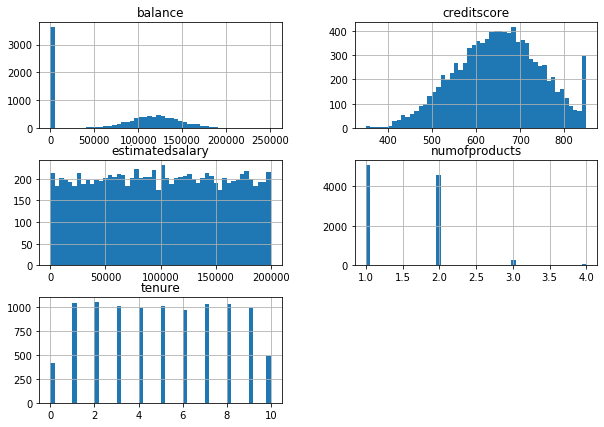

In [66]:
bank[required_columns].hist(bins=50,figsize=(10,7))

0    7963
1    2037
Name: exited, dtype: int64


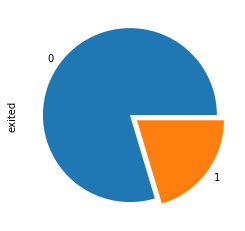

In [67]:
churn_count=bank['exited'].value_counts()
print(churn_count)
churn_count.plot.pie(explode=[0,0.1])

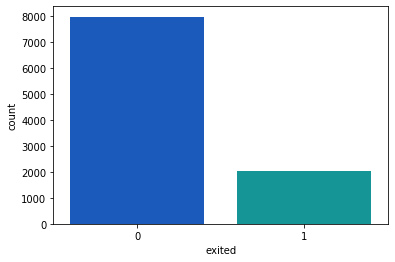

In [68]:
sns.countplot(x='exited',data=bank,palette='winter')

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix
conmat = confusion_matrix(y_test,y_predict)
print(conmat)
print(accuracy_score(y_test,y_predict))

[[1521   86]
 [ 253  140]]
0.8305


LINER REGRESSION

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lm= LinearRegression()

In [72]:
lm=lm.fit(X_train,y_train)

In [73]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
predictions=lm.predict(X_test)

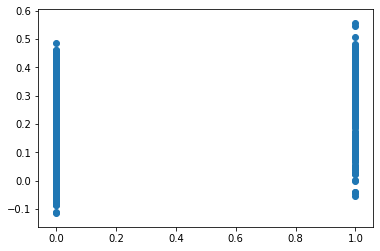

In [75]:
plt.scatter(y_test,predictions)

In [76]:
from sklearn.metrics import classification_report

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
print(accuracy_score(y_test,y_predict))

0.8305


In [79]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1607
           1       0.62      0.36      0.45       393

    accuracy                           0.83      2000
   macro avg       0.74      0.65      0.68      2000
weighted avg       0.81      0.83      0.81      2000



In [80]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict)*100,'%')

83.05 %


KNN

In [81]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors=10 , weights = 'distance' )
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [82]:
predicted_labels = NNH.predict(X_test)

In [83]:
print(NNH.score(X_test, y_test)*100,'%')

83.39999999999999 %


DECISION TREE CLASSIFIER

In [84]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [85]:
y_predict=model.predict(X_test)

In [86]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_predict)
print(acc)

0.7595


In [87]:
cm=metrics.confusion_matrix(y_test,y_predict)
print(cm)

[[1353  254]
 [ 227  166]]


In [88]:
cr=metrics.classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1607
           1       0.40      0.42      0.41       393

    accuracy                           0.76      2000
   macro avg       0.63      0.63      0.63      2000
weighted avg       0.77      0.76      0.76      2000



In [89]:
model2=DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [90]:
ypred2=model2.predict(X_test)

In [91]:
acc2=metrics.accuracy_score(y_test,ypred2)
print(acc2)

0.8435


In [92]:
cm2=metrics.confusion_matrix(y_test,ypred2)
print(cm2)

[[1506  101]
 [ 212  181]]


In [93]:
cr2=metrics.classification_report(y_test,ypred2) 
print(cr2)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.64      0.46      0.54       393

    accuracy                           0.84      2000
   macro avg       0.76      0.70      0.72      2000
weighted avg       0.83      0.84      0.83      2000



In [94]:
print(acc2*100,'%')

84.35000000000001 %


FINAL ESTIMATION 

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

LOGISTIC REGRESSION

In [96]:
logmodel = LogisticRegression(random_state=50)
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
logmodel_accuracy = round(metrics.accuracy_score(y_test, pred) * 100, 2)

C:\Users\KIIT\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LINEAR REGRESSION

In [102]:
svcmodel = SVC(kernel='linear', random_state=50, probability=True)
svcmodel.fit(X_train,y_train)
svc_pred = svcmodel.predict(X_test)
svc_accuracy = round(metrics.accuracy_score(y_test, svc_pred) * 100, 2)

KNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2) #p=2 represents Euclidean distance, p=1 represents Manhattan Distance
knnmodel.fit(X_train, y_train)
knn_pred = knnmodel.predict(X_test)
knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred) * 100, 2)

DECISION TREE

In [105]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
model.fit(X_train, y_train) 
ypred2 =model.predict(X_test)
acc2=metrics.accuracy_score(y_test,ypred2)
dt_pred = model.predict(X_test)
dt_accuracy = round(metrics.accuracy_score(y_test, ypred2) * 100, 2)

RANDOM FOREST CLASSIFIER

In [106]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfmodel.fit(X_train, y_train) 
rf_pred = rfmodel.predict(X_test)
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)

In [115]:
from sklearn.metrics import confusion_matrix
conf_mat_logmodel = confusion_matrix(y_test,pred)
conf_mat_logmodel

array([[1587,   20],
       [ 351,   42]], dtype=int64)

In [116]:

Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
              'Decision Tree', 'Random Forest'],
    'Score': [logmodel_accuracy, svc_accuracy, knn_accuracy, 
              dt_accuracy, rf_accuracy]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()

,Score,Model
0,84.40,Decision Tree
1,83.65,Random Forest
2,82.10,K-Nearest Neighbor
3,81.45,Logistic Regression
4,80.35,Support Vector Machine
